### Exercise 2(a)



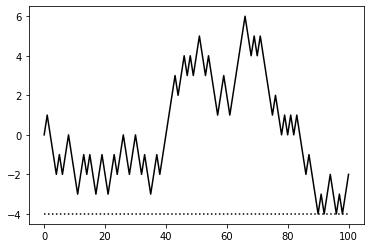

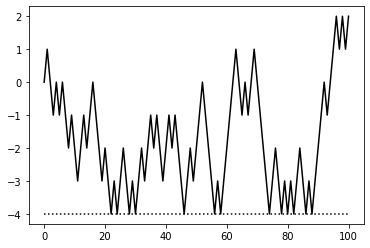

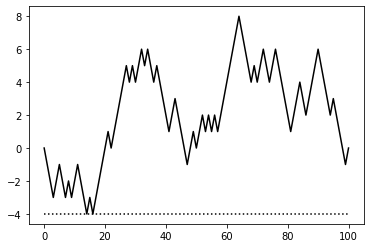

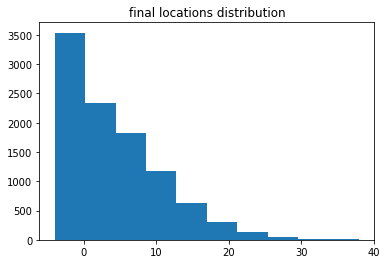

In [2]:
# There is a barrier at -4, so the walk has to go back to -3 from there.
import numpy as np
import matplotlib.pyplot as plt

n_steps = 100  # Number of steps in each random walk
n_trials = 10000  # Number of random walks
n_plots = 3  # How many random walks to plot

plot_count = 0
results = []
for _ in range(n_trials):
    path = [0]  # Start at 0
    for step in range(n_steps):
        if path[-1] == -4:  # Barrier at -4, have to go to -3
            path.append(-3)
        else:
            path.append(path[-1] + np.random.choice([-1, 1]))
    results.append(path[-1])  # Record final location

    # Plot some paths that hit the barrier
    if (-4 in path) and (plot_count < n_plots):
        plt.figure()
        plt.plot(path, 'k-')
        plt.plot([0, len(path) - 1], [-4, -4], 'k:')
        plot_count += 1
plt.figure()
plt.hist(results)
plt.title('final locations distribution')
plt.show()

### Exercise 2(b)

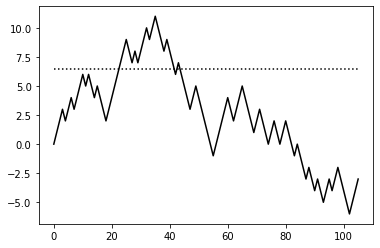

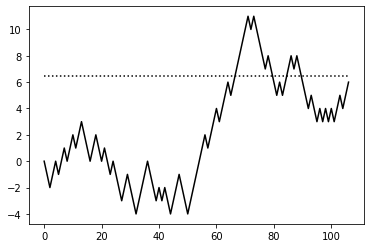

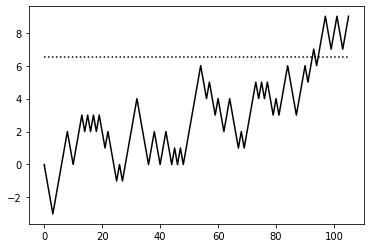

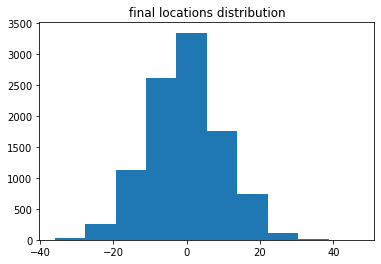

In [3]:
n_steps = 100  # Number of steps in each random walk
n_trials = 10000  # Number of random walks
n_plots = 3  # How many random walks to plot

plot_count = 0
results = []

for _ in range(n_trials):
    path = [0]  # Start at 0
    for step in range(n_steps):
        if path[-1] == 6:
            path.append(5 if np.random.uniform(0, 1) < 0.75 else 7)
        if path[-1] == 7:
            path.append(8 if np.random.uniform(0, 1) < 0.75 else 6)
        else:
            path.append(path[-1] + np.random.choice([-1, 1]))
    results.append(path[-1])  # Record final location

    # Plot some paths that crossed the barrier a few times
    if (sum(set(path[i:i+2]) == {6,7} for i in range(len(path)-1)) > 2) and (plot_count < n_plots):
        plt.figure()
        plt.plot(path, 'k-')
        plt.plot([0, len(path) - 1], [6.5, 6.5], 'k:')
        plot_count += 1

plt.figure()
plt.hist(results)
plt.title('final locations distribution')
plt.show()



## Exercise 4

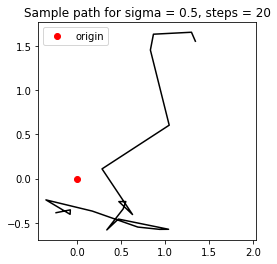

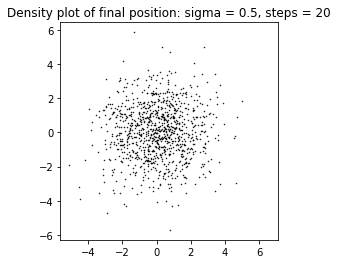

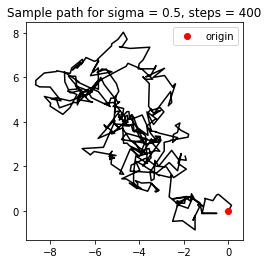

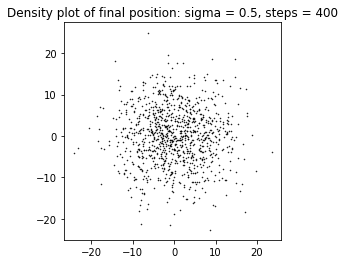

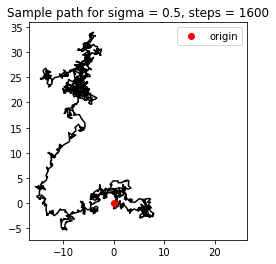

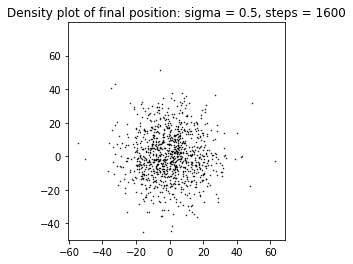

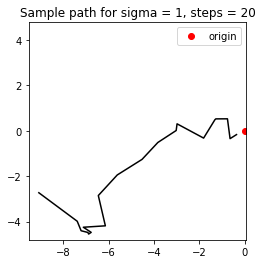

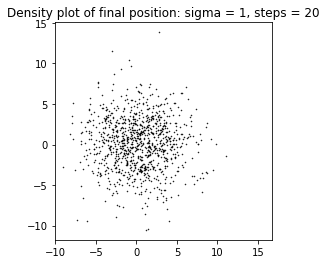

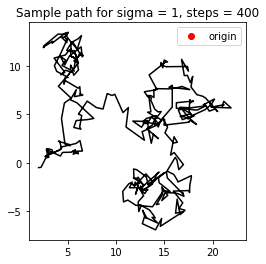

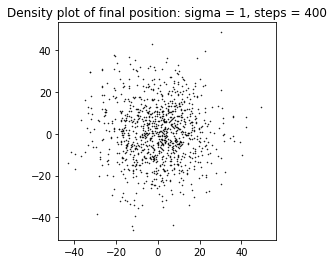

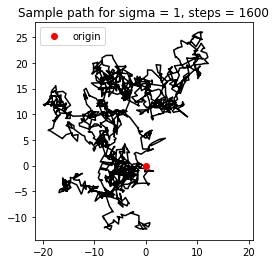

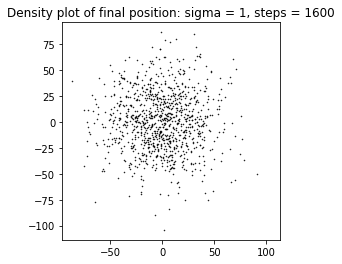

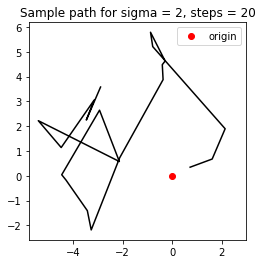

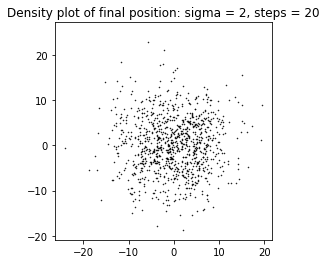

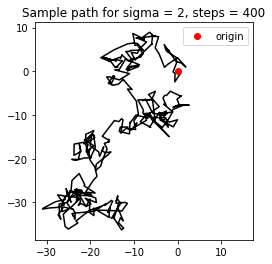

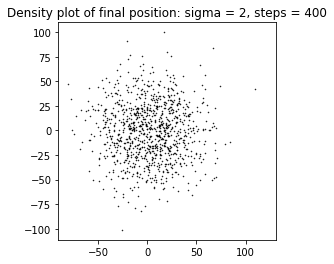

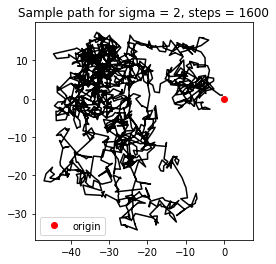

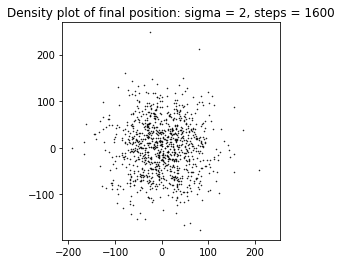

In [8]:
n_trials = 1000  # Number of random walks
n_plots = 1  # How many random walks to plot

for sigma in [0.5, 1, 2]:  # Standard deviation of random walk step size
    for steps in [20, 400, 1600]:  # Number of steps in each random walk
        results = np.zeros((n_trials, 2))
        plot_count = 0
        for trial in range(n_trials):
            # Generate random random directions and step sizes and add
            # them all up to get the random walk path
            direction = np.random.uniform(0, 2 * np.pi, size=steps)
            magnitude = np.random.normal(0, sigma, size=steps)
            x_step = magnitude * np.cos(direction)
            y_step = magnitude * np.sin(direction)
            path = np.array([x_step.cumsum(), y_step.cumsum()]).transpose()
            results[trial] = path[-1]

            # Plot some sample paths
            if plot_count < n_plots:
                plt.figure()
                plt.plot(path[:,0], path[:,1], 'k-')
                plt.axis('square')
                plt.plot(0, 0, 'ro', label="origin")
                plt.title('Sample path for sigma = ' + str(sigma) + ', steps = ' + str(steps))
                plt.legend()
                plot_count += 1

        # Density plot of final position
        plt.figure()
        plt.plot(results[:,0], results[:,1], 'k.', markersize=1)
        plt.axis('square')
        plt.title('Density plot of final position: sigma = ' + str(sigma) + ', steps = ' + str(steps))
plt.show()

### Exercise 9(a)

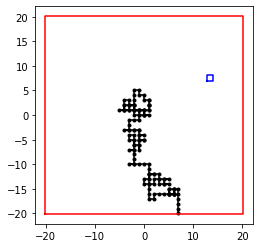

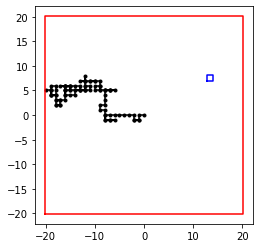

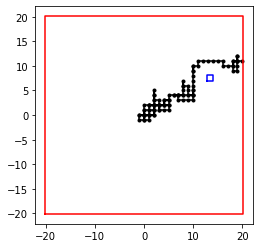

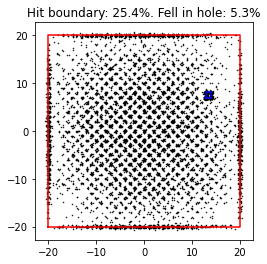

In [9]:
n_steps = 250  # Number of steps in each random walk
n_trials = 10000  # Number of random walks
n_plots = 3  # How many random walks to plot

results = np.zeros((n_trials, 2), dtype=int)
plot_count = 0
boundary_count = 0
hole_count = 0

for trial in range(n_trials):
    path = np.zeros((n_steps + 1, 2), dtype=int)
    for step in range(n_steps):
        path[step+1] = (
            path[step] +
            [(-1, 0), (1, 0), (0, -1), (0, 1)][np.random.randint(4)])
        if (path[step+1][0] in [-20, 20]) or (path[step+1][1] in [-20, 20]):
            # Hit boundary
            boundary_count += 1
            break
        elif (13 <= path[step+1][0] <= 14) and (7 <= path[step+1][1] <= 8):
            # Fell into hole
            hole_count += 1
            break
    results[trial] = path[step+1]  # Save the last step in the path
    if (step < n_steps-1) and (plot_count < n_plots):
        # Plot some paths that either hit the boundary or the hole
        plt.figure()
        plt.plot(  # Plot the path
            path[:step + 2, 0],
            path[:step + 2, 1],
            'k.-')
        plt.plot(  # Plot the hole
            [12.9, 12.9, 14.1, 14.1, 12.9],
            [6.9, 8.1, 8.1, 6.9, 6.9],
            'b-')
        plt.plot(  # Plot the boundary
            [-20.1, -20.1, 20.1, 20.1, -20.1],
            [-20.1, 20.1, 20.1, -20.1, -20.1],
            'r-')
        plt.axis('square')
        plot_count += 1

# Density plot of final position
plt.figure()
plt.plot(
    results[:,0] + np.random.normal(0, 0.2, size=n_trials),
    results[:,1] + np.random.normal(0, 0.2, size=n_trials),
    'k.', markersize=1)
plt.plot(
    [12.9, 12.9, 14.1, 14.1, 12.9],
    [6.9, 8.1, 8.1, 6.9, 6.9],
    'b-')
plt.plot(
    [-20.1, -20.1, 20.1, 20.1, -20.1],
    [-20.1, 20.1, 20.1, -20.1, -20.1],
    'r-')
plt.axis('square')
plt.title(
    'Hit boundary: %.1f%%. Fell in hole: %.1f%%' % (
        boundary_count / n_trials * 100, hole_count / n_trials * 100))
plt.show()